# Image Classification with CNN using Keras

In [1]:
#importing the neccessary libraries
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
#to check the version of tensorflow
print('Is using GPU?', tf.test.is_gpu_available())
#to check if gpu is available or not

TensorFlow version: 2.0.1
Is using GPU? False


In [2]:
#using only three classes of CIFAR10
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    #it will return the indices
    #using first 3
    
    
    classes of CIFAR10

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    #concatenate the indices
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    #to make the indices unique we set replace =Flase
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    #it will convert the labels to one hot encoding
    
    return x, y

In [4]:
#load the data from keras
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_three_classes(x_train,y_train)
x_test,y_test=get_three_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#to check whether we have only three classes or not

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


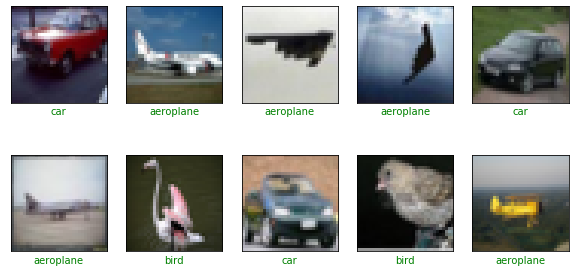

In [7]:
#These are the class labels
class_names = ['aeroplane', 'car', 'bird']

def show_Random_Example(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    #replace meant that all the values that are return will be unique
    #first parameter will be the list and second will be the number of indices we want
    #to take random 10 images
    
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        #to show the images
        plt.xticks([])
        plt.yticks([])
        #to remove any images near the labels
        col='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        #to make the labels colors according to correct or wrong predictions
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
    
show_Random_Example(x_train,y_train,y_train)

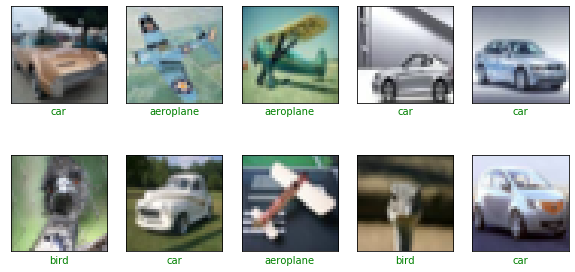

In [8]:
show_Random_Example(x_test,y_test,y_test)
#since we dont have predictions now so we are using ground truth only

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
#layers we are going to use

def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        #convolution layer with relu activation and same padding
        model.add(BatchNormalization())
        #to make proper co-variance shift and help in regularization
        model.add(Conv2D(num_filters,3,activation='relu'))
        #keeping the padding default
        model.add(MaxPooling2D(pool_size=2))
        #to reduce the size of row and columns to half of original values
        model.add(Dropout(0.5))
        return model
    
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    #adding the input layer
    
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    #adding three convolution blocks
    
    model.add(Flatten())
    #to flatten the output of convolutional block
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

model=create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)       

In [15]:
#training of the model
h=model.fit(
    x_train/255.,y_train,
    validation_data=(x_test/255.,y_test),
    epochs=10,batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'Models/model_{val_accuracy:.3f}.h5',
            save_best_only=True,
            save_weights_only=False,
            monitor='val_accuracy'
                )
    ]
)
#passing the data with normalizing it
#first callback is used to check the validation accuracy and stop the model if it didn't improve after three epochs
#to change the hyperparameters
#monitoring the val_Accuracy and saving the model which has done better than previous epochs
#we will save the whole model with full data and weights and instances

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 144s 10ms/sample - loss: 0.8885 - accuracy: 0.6772 - val_loss: 3.0997 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 137s 9ms/sample - loss: 0.5581 - accuracy: 0.7729 - val_loss: 3.7313 - val_accuracy: 0.3333
Epoch 3/10
15000/15000 [==============================] - 139s 9ms/sample - loss: 0.4798 - accuracy: 0.8081 - val_loss: 3.4241 - val_accuracy: 0.3357
Epoch 4/10
15000/15000 [==============================] - 140s 9ms/sample - loss: 0.4409 - accuracy: 0.8268 - val_loss: 1.6998 - val_accuracy: 0.4753
Epoch 5/10
15000/15000 [==============================] - 141s 9ms/sample - loss: 0.3969 - accuracy: 0.8437 - val_loss: 0.6457 - val_accuracy: 0.7597
Epoch 6/10
15000/15000 [==============================] - 140s 9ms/sample - loss: 0.3594 - accuracy: 0.8608 - val_loss: 0.3894 - val_accuracy: 0.8477
Epoch 7/10
15000/15000 [==========================

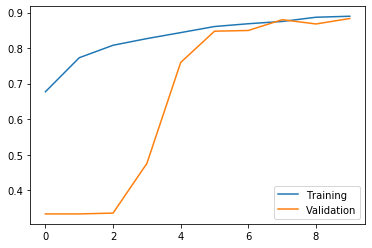

In [17]:
#to check how train accuracy and validation accuracy changes with epochs
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']

plt.plot(range(10),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.legend()
plt.show()

In [18]:
#to load the best model that we have saved
model=tf.keras.models.load_model('Models/model_0.883.h5')
#it will return the model instances

In [19]:
#to predict on x_test using normalizing also
preds=model.predict(x_test/255.)

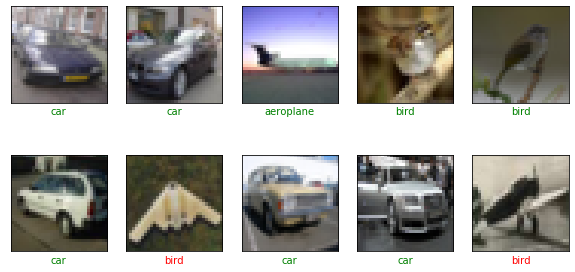

In [20]:
#now to show the random samples with ground truth and predictions
#red labels one are worngly predicted where green one are righthly predicted
show_Random_Example(x_test,y_test,preds)